# Telcom Churn Prediction


---

Here’s a [`dataset of telecom customers`](https://drive.google.com/uc?export=download&id=1A3MUldrs0z09DlYR6Y1utfySwKNO9Qsz), which you can also find on [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). There is data available on 5’986 customers.

Which customers are likely to churn? What are the attributes that make you think so?
### The features

- `customerID` - customer id  
- `gender` - client gender (male / female)  
- `SeniorCitizen` - is the client retired (1, 0)  
- `Partner` - is the client married (Yes, No)  
- `tenure` - how many months a person has been a client of the company  
- `PhoneService` - is the telephone service connected (Yes, No)  
- `MultipleLines` - are multiple phone lines connected (Yes, No, No phone service)  
- `InternetService` - client’s Internet service provider (DSL, Fiber optic, No)  
- `OnlineSecurity` - is the online security service connected (Yes, No, No internet service)  
- `OnlineBackup` - is the online backup service activated (Yes, No, No internet service)  
- `DeviceProtection` - does the client have equipment insurance (Yes, No, No internet service)  
- `TechSupport` - is the technical support service connected (Yes, No, No internet service)  
- `StreamingTV` - is the streaming TV service connected (Yes, No, No internet service)  
- `StreamingMovies` - is the streaming cinema service activated (Yes, No, No internet service)  
- `Contract` - type of customer contract (Month-to-month, One year, Two year)  
- `PaperlessBilling` - whether the client uses paperless billing (Yes, No)  
- `PaymentMethod` - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
- `MonthlyCharges` - current monthly payment  
- `TotalCharges` - the total amount that the client paid for the services for the entire time  
- `Churn` - whether there was a churn (Yes or No)  


### 1. Load and inspect the dataset

In [40]:
# Download the dataset manually if necessary and place it in the 'data/' directory
# Then, load the dataset

import pandas as pd

# Load data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1A3MUldrs0z09DlYR6Y1utfySwKNO9Qsz", index_col=0)

# Display first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### 2. Preprocess the dataset

In [ ]:
# Check for missing values and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 
 17

In [42]:
# Hint: 'TotalCharges' is object type – convert it to numeric
# Strip whitespaces and convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", pd.NA), errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)


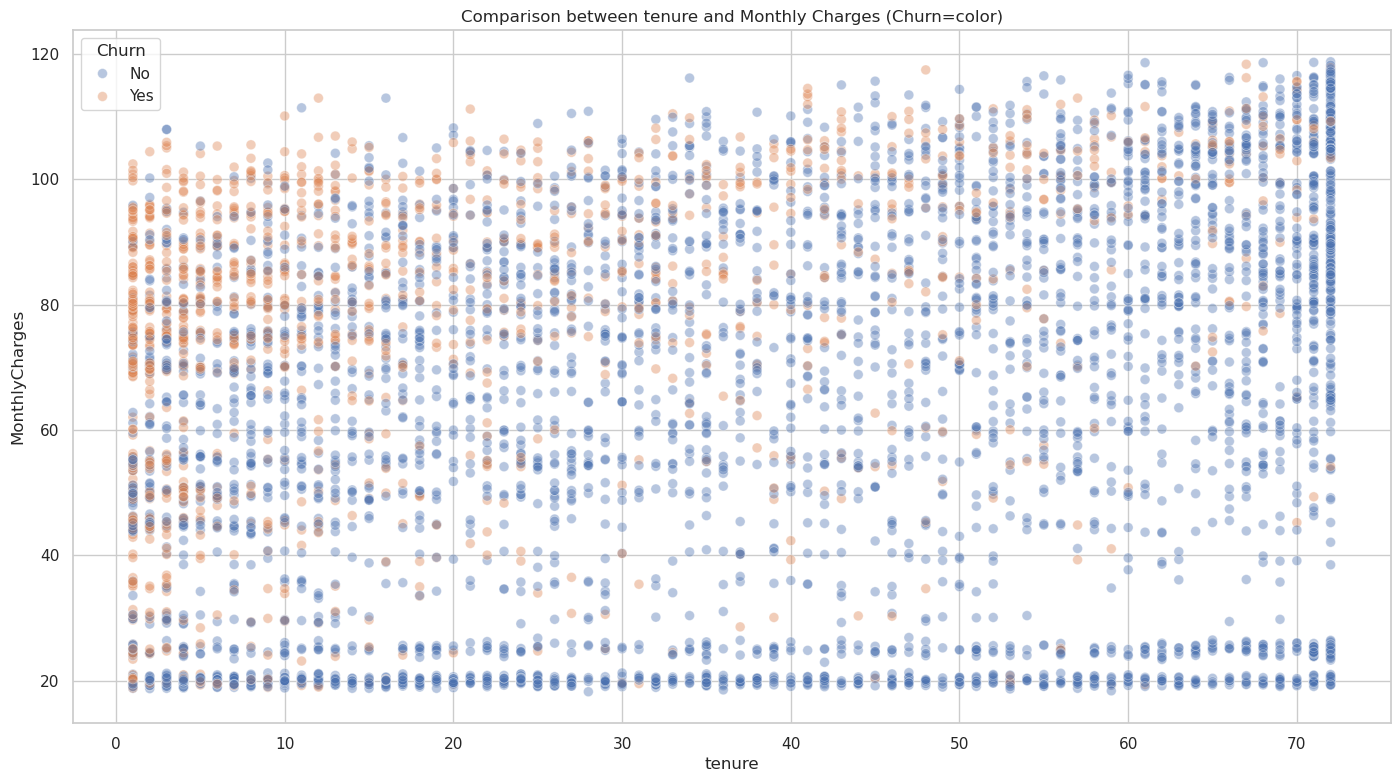

In [68]:
plt.figure(figsize=(17, 9))
plt.title('Comparison between tenure and Monthly Charges (Churn=color)')
sns.scatterplot(x=df["tenure"], y=df['MonthlyCharges'], hue=df['Churn'], s=50, alpha=0.4);


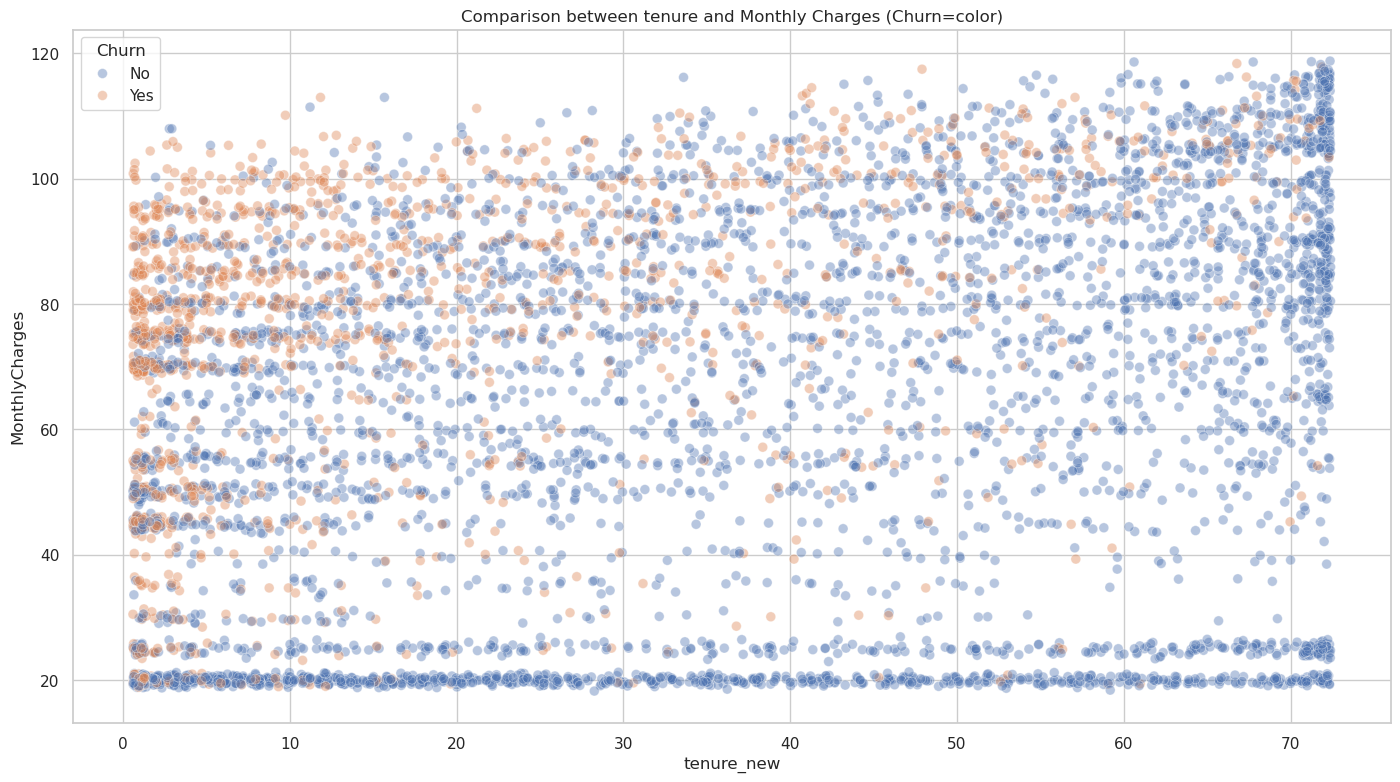

In [67]:
# create tenure_new by adding randomly +/- 0.4
df2 = df.copy()
df2['tenure_new'] = df2['tenure'] + np.random.uniform(-0.4, 0.4, size=len(df2))
plt.figure(figsize=(17, 9))
plt.title('Comparison between tenure and Monthly Charges (Churn=color)')
sns.scatterplot(x=df2["tenure_new"], y=df2['MonthlyCharges'], hue=df2['Churn'], s=50, alpha=0.4);


### 3. Encode categorical variables

Mean values of encoded features:
SeniorCitizen                               0.161647
tenure                                     32.523092
MonthlyCharges                             64.846687
TotalCharges                             2298.060617
gender_Male                                 0.509371
Partner_Yes                                 0.484605
Dependents_Yes                              0.298025
PhoneService_Yes                            0.901606
MultipleLines_No phone service              0.098394
MultipleLines_Yes                           0.425870
InternetService_Fiber optic                 0.439592
InternetService_No                          0.215027
OnlineSecurity_No internet service          0.215027
OnlineSecurity_Yes                          0.285977
OnlineBackup_No internet service            0.215027
OnlineBackup_Yes                            0.349230
DeviceProtection_No internet service        0.215027
DeviceProtection_Yes                        0.343373
TechSupport_N

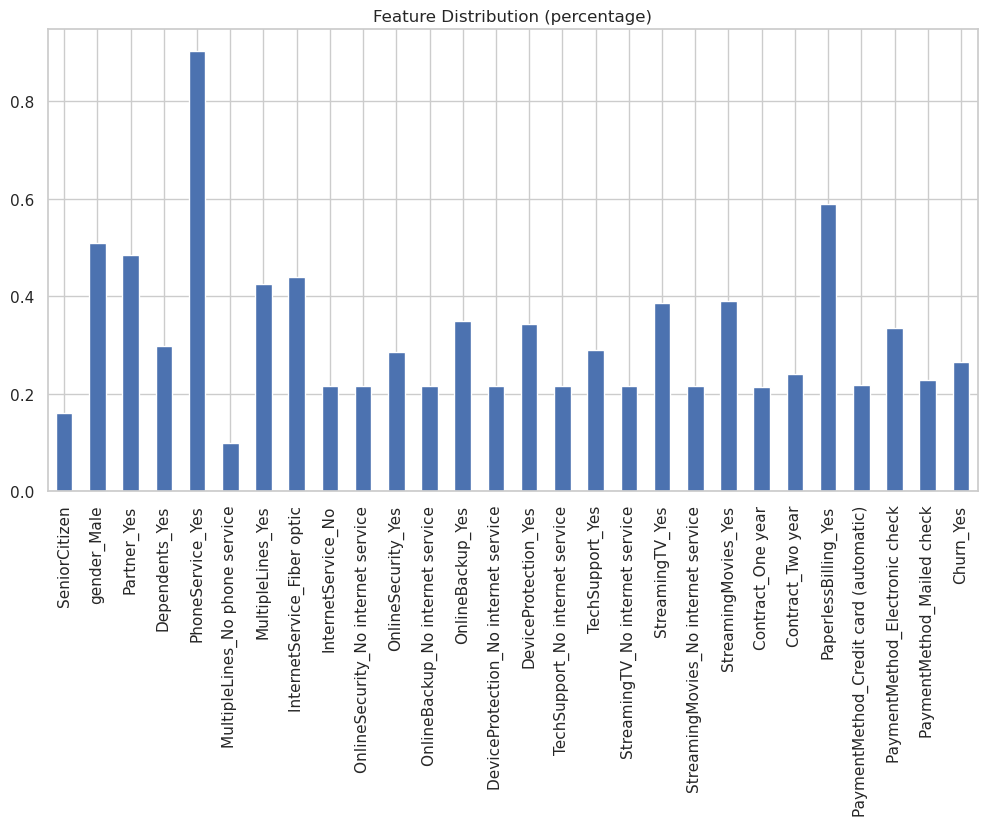

In [ ]:
# Use one-hot encoding for categorical features
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)


df_encoded.drop(columns=['MonthlyCharges', 'TotalCharges', 'tenure']).mean().plot(
    kind='bar', figsize=(12, 6), title='Feature Distribution (percentage)'
)

print("Mean values of encoded features:")
print(df_encoded.mean())

In [44]:
import numpy as np
# Feature engineering

# Convert 'SeniorCitizen' to boolean
df_encoded["SeniorCitizen"] = df_encoded["SeniorCitizen"].astype(bool)

# Avg_MonthlyCharges: handle division by zero
df_encoded["Avg_MonthlyCharges"] = df_encoded["TotalCharges"] / df_encoded["tenure"].replace(0, np.nan)

# Count of active services (engagement depth)
df_encoded["Services_Count"] = df_encoded[
    [
        "PhoneService_Yes",
        "MultipleLines_Yes",
        "InternetService_Fiber optic",
        "OnlineSecurity_Yes",
        "OnlineBackup_Yes",
        "DeviceProtection_Yes",
        "TechSupport_Yes",
        "StreamingTV_Yes",
        "StreamingMovies_Yes",
    ]
].sum(axis=1)

# Protection bundle score
df_encoded["TechServices_Used"] = df_encoded[["OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes", "TechSupport_Yes"]].sum(
    axis=1
)

# Heavy streamer
df_encoded["Is_Heavy_Streamer"] = (df_encoded["StreamingTV_Yes"] == 1) & (df_encoded["StreamingMovies_Yes"] == 1)

# Has multiple services (3+)
df_encoded["Has_MultipleServices"] = df_encoded["Services_Count"] >= 3

# Has tech support only
df_encoded["Has_TechSupport_Only"] = (
    (df_encoded["TechSupport_Yes"] == 1)
    & (df_encoded["OnlineSecurity_Yes"] == 0)
    & (df_encoded["OnlineBackup_Yes"] == 0)
    & (df_encoded["DeviceProtection_Yes"] == 0)
)

# What the customer would have paid if charged current monthly rate all along
df_encoded["UniformRateTotal"] = df_encoded["MonthlyCharges"] * df_encoded["tenure"]

# Difference between uniform-rate total and actual historical payments
df_encoded["HistoricalRateGap"] = df_encoded["UniformRateTotal"] - df_encoded["TotalCharges"]

# Historical average monthly rate
df_encoded["HistoricalAvgMonthlyRate"] = df_encoded["TotalCharges"] / df_encoded["tenure"]

# Difference between current monthly rate and historical average monthly rate
df_encoded["CurrentChargeOverHistorical"] = df_encoded["MonthlyCharges"] - df_encoded["HistoricalAvgMonthlyRate"]


# Paperless + autopay = loyal?
df_encoded["Is_Paperless_AutoPay"] = (df_encoded["PaperlessBilling_Yes"] == 1) & (df_encoded["PaymentMethod_Credit card (automatic)"] == 1)

# High-risk payment group
df_encoded["High_Risk_Payment"] = (df_encoded["PaperlessBilling_Yes"] == 1) & (df_encoded["PaymentMethod_Electronic check"] == 1)

# Social support features
df_encoded["Is_SeniorAlone"] = (df_encoded["SeniorCitizen"] == 1) & (df_encoded["Partner_Yes"] == 0) & (df_encoded["Dependents_Yes"] == 0)

df_encoded["Is_Young_Family"] = (df_encoded["SeniorCitizen"] == 0) & (
    (df_encoded["Partner_Yes"] == 1) | (df_encoded["Dependents_Yes"] == 1)
)

# Categoricl features for tenure and monthly charges
df_encoded["Is_NewCostumer"] = df_encoded["tenure"] == 1
df_encoded["Is_Longterm"] = df_encoded["tenure"] > 20
df_encoded["Is_MaximumTenure"] = df_encoded["tenure"] == 72
df_encoded["CheapFlatrate_yes"] = df_encoded["MonthlyCharges"] < 27
df_encoded["HighCost_g60"] = df_encoded["MonthlyCharges"] > 60

# Categorical features for monthly charges


# Hardcoded tariff bin boundaries based on  clustering
boundaries = [-np.inf, 25.53625, 34.4975, 48.31625, 66.9925, 88.14775, np.inf]
labels = ["VeryLow", "Low", "Medium", "MediumHigh", "High", "Premium"]

# Assign tariff band
df_encoded["TariffBand"] = pd.cut(df_encoded["MonthlyCharges"], bins=boundaries, labels=labels)

# One-hot encode as boolean features
df_encoded = pd.get_dummies(df_encoded, columns=["TariffBand"], prefix="Tariff", dtype=bool)


df_encoded.mean()

SeniorCitizen                               0.161647
tenure                                     32.523092
MonthlyCharges                             64.846687
TotalCharges                             2298.060617
gender_Male                                 0.509371
Partner_Yes                                 0.484605
Dependents_Yes                              0.298025
PhoneService_Yes                            0.901606
MultipleLines_No phone service              0.098394
MultipleLines_Yes                           0.425870
InternetService_Fiber optic                 0.439592
InternetService_No                          0.215027
OnlineSecurity_No internet service          0.215027
OnlineSecurity_Yes                          0.285977
OnlineBackup_No internet service            0.215027
OnlineBackup_Yes                            0.349230
DeviceProtection_No internet service        0.215027
DeviceProtection_Yes                        0.343373
TechSupport_No internet service             0.

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 1869 to 860
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5976 non-null   bool   
 1   tenure                                 5976 non-null   int64  
 2   MonthlyCharges                         5976 non-null   float64
 3   TotalCharges                           5976 non-null   float64
 4   gender_Male                            5976 non-null   bool   
 5   Partner_Yes                            5976 non-null   bool   
 6   Dependents_Yes                         5976 non-null   bool   
 7   PhoneService_Yes                       5976 non-null   bool   
 8   MultipleLines_No phone service         5976 non-null   bool   
 9   MultipleLines_Yes                      5976 non-null   bool   
 10  InternetService_Fiber optic            5976 non-null   bool   
 11  Interne

In [46]:
df_encoded.describe()


,tenure,MonthlyCharges,TotalCharges,Avg_MonthlyCharges,Services_Count,TechServices_Used,UniformRateTotal,HistoricalRateGap,HistoricalAvgMonthlyRate,CurrentChargeOverHistorical
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617,64.844044,3.812082,1.268407,2297.585894,-0.474724,64.844044,0.002643
std,24.500858,30.107576,2274.127165,30.218818,2.294909,1.288083,2271.532877,67.195909,30.218818,2.624425
min,1.000000,18.250000,18.800000,13.775000,0.000000,0.000000,18.800000,-373.250000,13.775000,-18.900000
25%,9.000000,35.750000,404.312500,36.359279,2.000000,0.000000,399.575000,-28.900000,36.359279,-1.159375
50%,29.000000,70.425000,1412.150000,70.498684,4.000000,1.000000,1408.700000,0.000000,70.498684,0.000000
75%,56.000000,89.900000,3846.962500,90.302500,6.000000,2.000000,3848.687500,28.312500,90.302500,1.130377
max,72.000000,118.750000,8684.800000,121.400000,9.000000,4.000000,8550.000000,370.850000,121.400000,19.125000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
       [<Axes: title={'center': 'Avg_MonthlyCharges'}>,
        <Axes: title={'center': 'Services_Count'}>,
        <Axes: title={'center': 'TechServices_Used'}>],
       [<Axes: title={'center': 'UniformRateTotal'}>,
        <Axes: title={'center': 'HistoricalRateGap'}>,
        <Axes: title={'center': 'HistoricalAvgMonthlyRate'}>],
       [<Axes: title={'center': 'CurrentChargeOverHistorical'}>,
        <Axes: >, <Axes: >]], dtype=object)

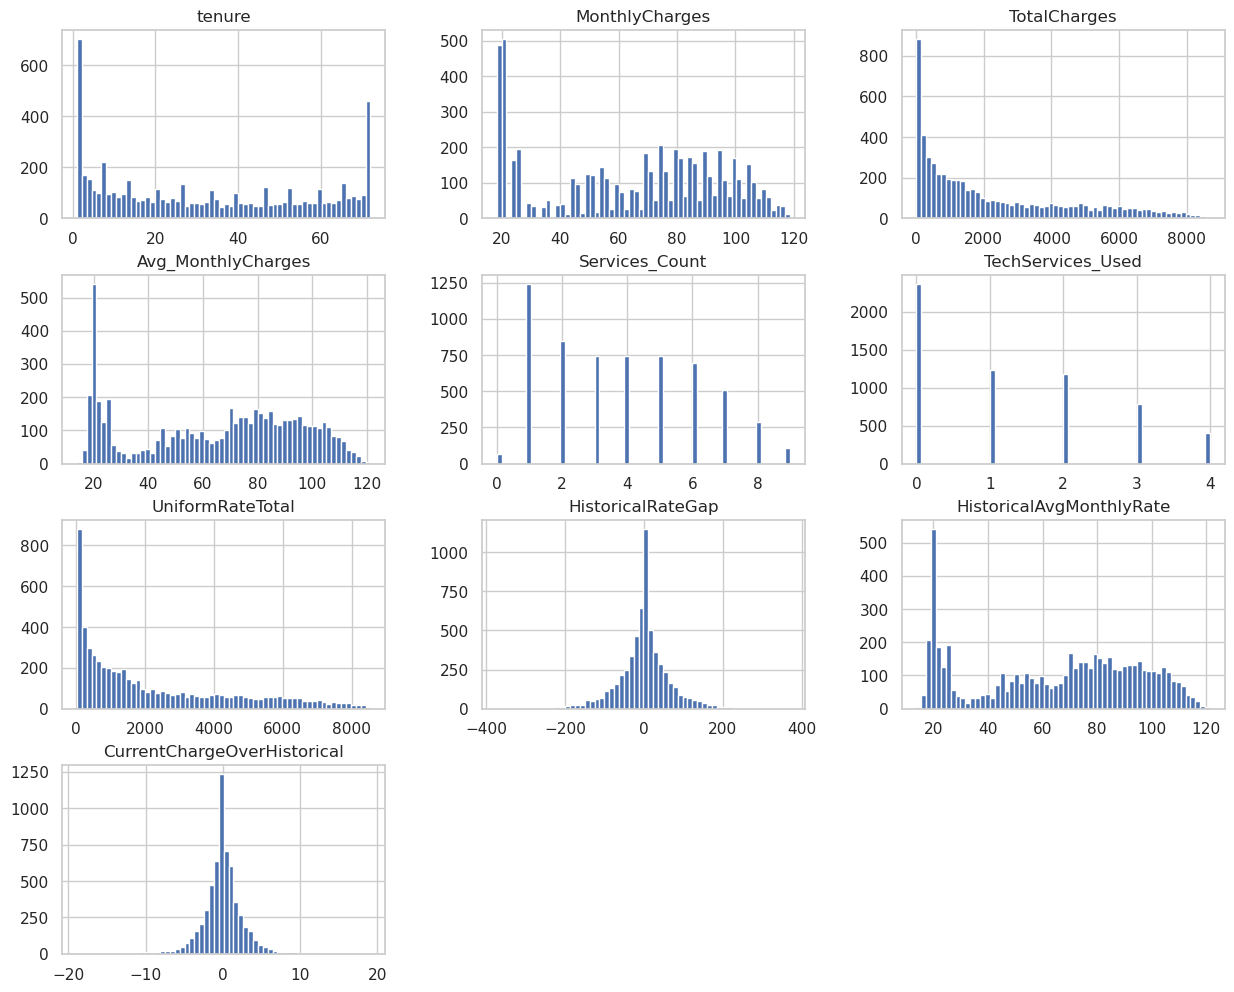

In [47]:
# show the distribution of the numerical features
df_encoded.select_dtypes(include='number').hist(figsize=(15, 12), bins=60, grid=True)


### 4. Split the data into train and test sets

In [48]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Evaluate Feature Importance with CatBoost and LogisticRegression

📌 Applying oversampling to balance full training set...
➡️ Class distribution after resampling:
 Churn_Yes
False    3511
True     3511
Name: count, dtype: int64
📌 Scaling features...
📌 Performing Stratified 5-Fold CV...

🔁 Fold 1

🔁 Fold 2

🔁 Fold 3

🔁 Fold 4

🔁 Fold 5

📋 Classification Report – CatBoost:
              precision    recall  f1-score   support

          No       0.90      0.80      0.85      3511
         Yes       0.82      0.91      0.86      3511

    accuracy                           0.86      7022
   macro avg       0.86      0.86      0.86      7022
weighted avg       0.86      0.86      0.86      7022


📋 Classification Report – Logistic Regression:
              precision    recall  f1-score   support

          No       0.79      0.72      0.76      3511
         Yes       0.75      0.81      0.78      3511

    accuracy                           0.77      7022
   macro avg       0.77      0.77      0.77      7022
weighted avg       0.77      0.77      0.77   

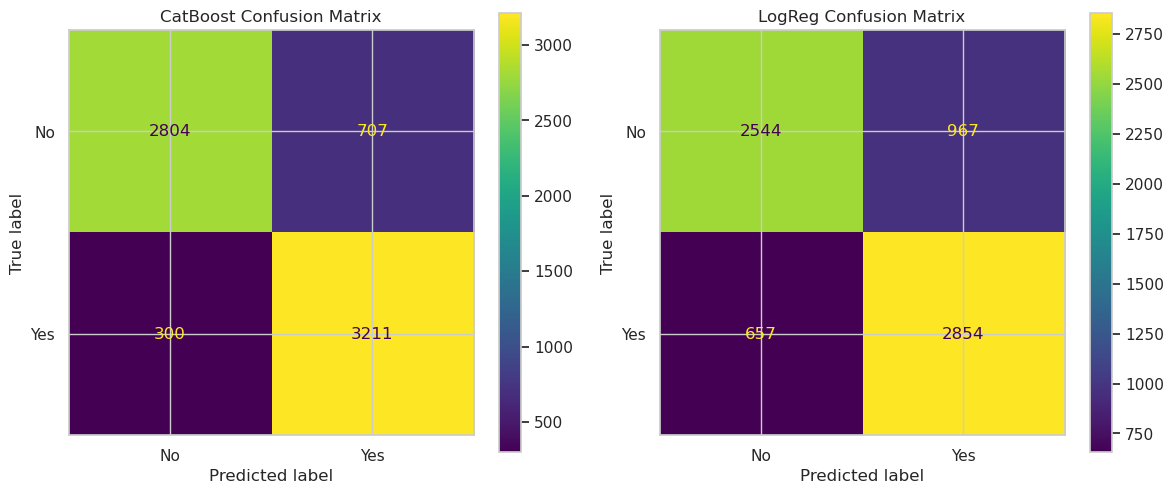

📊 Computing SHAP values on 1000-sample from full training set...


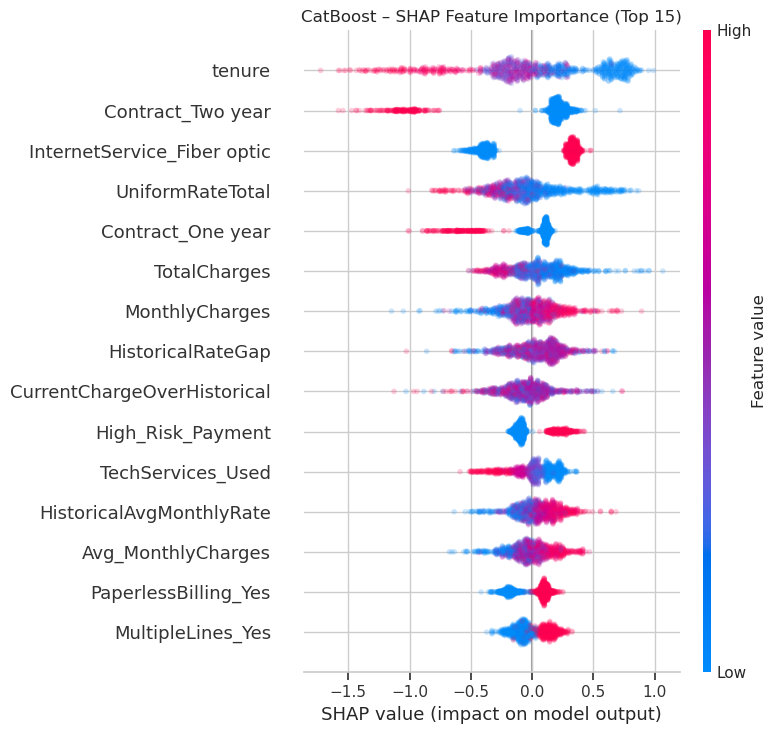

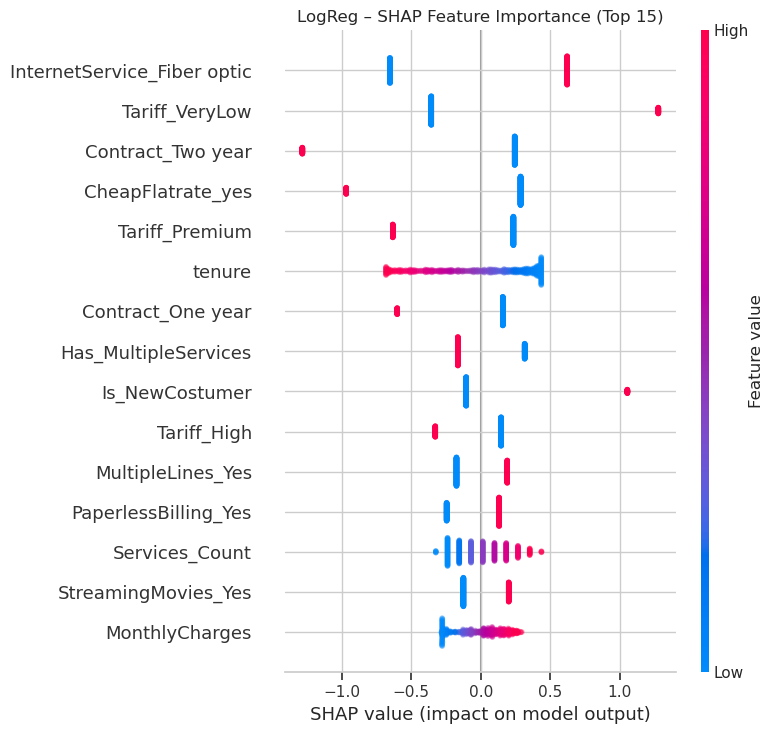

📊 Gathering feature importances...
📋 Combined Feature Importances:


,CatBoost_SHAP,LogReg_SHAP,CatBoost_Builtin,LogReg_Builtin
tenure,0.444201,0.331421,8.822537,0.377403
Contract_Two year,0.371120,0.431504,5.329949,0.573065
InternetService_Fiber optic,0.363073,0.636109,2.878779,0.636451
UniformRateTotal,0.241210,0.075824,5.673006,0.092460
Contract_One year,0.186704,0.238206,2.383233,0.280697
TotalCharges,0.182470,0.075299,5.487573,0.091769
MonthlyCharges,0.171421,0.151816,7.714173,0.172384
HistoricalRateGap,0.166665,0.014488,8.795756,0.022028
CurrentChargeOverHistorical,0.153993,0.018635,8.727894,0.027850
High_Risk_Payment,0.141713,0.004558,1.510477,0.005414


📊 Precision and Recall vs Threshold...


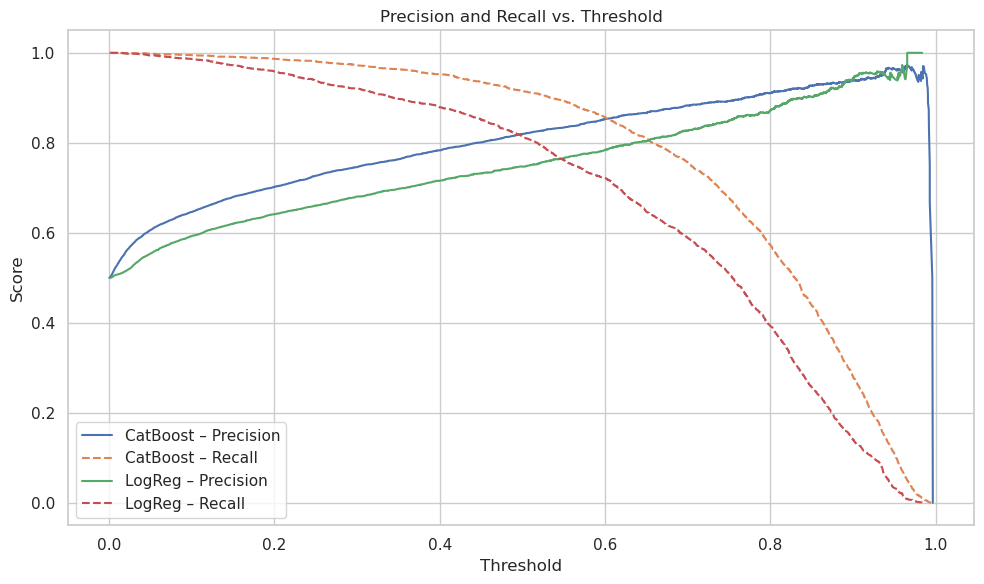

In [61]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import shap, pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display

# 📌 Oversample original training set
print("📌 Applying oversampling to balance full training set...")
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("➡️ Class distribution after resampling:\n", pd.Series(y_resampled).value_counts())

# 📌 Standardize data for Logistic Regression
print("📌 Scaling features...")
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# 📊 Cross-validation setup
print("📌 Performing Stratified 5-Fold CV...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ⏱️ Store results
cat_preds, lr_preds = [], []
cat_probs, lr_probs = [], []
cat_true, lr_true = [], []

fold = 0
for train_idx, val_idx in skf.split(X_resampled, y_resampled):
    fold += 1
    print(f"\n🔁 Fold {fold}")

    X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    # Train CatBoost
    cat = CatBoostClassifier(verbose=0, random_state=42, iterations=600, learning_rate=0.05)
    cat.fit(X_tr, y_tr)
    cat_preds.append(cat.predict(X_val))
    cat_probs.append(cat.predict_proba(X_val)[:, 1])
    cat_true.append(y_val)

    # Train Logistic Regression
    lr = LogisticRegression(max_iter=5000, random_state=42)
    lr.fit(X_tr_scaled, y_tr)
    lr_preds.append(lr.predict(X_val_scaled))
    lr_probs.append(lr.predict_proba(X_val_scaled)[:, 1])
    lr_true.append(y_val)

# Concatenate results
y_true_cat = pd.concat(cat_true)
y_pred_cat = np.concatenate(cat_preds)
y_prob_cat = np.concatenate(cat_probs)

y_true_lr = pd.concat(lr_true)
y_pred_lr = np.concatenate(lr_preds)
y_prob_lr = np.concatenate(lr_probs)

# 📋 Classification Reports
print("\n📋 Classification Report – CatBoost:")
print(classification_report(y_true_cat, y_pred_cat, target_names=["No", "Yes"]))

print("\n📋 Classification Report – Logistic Regression:")
print(classification_report(y_true_lr, y_pred_lr, target_names=["No", "Yes"]))

# 📊 Confusion Matrices
print("📊 Confusion Matrices...")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_true_cat, y_pred_cat, ax=ax[0], display_labels=["No", "Yes"])
ax[0].set_title("CatBoost Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_true_lr, y_pred_lr, ax=ax[1], display_labels=["No", "Yes"])
ax[1].set_title("LogReg Confusion Matrix")
plt.tight_layout()
plt.show()

# 🧠 SHAP values on sample from full training set
print("📊 Computing SHAP values on 1000-sample from full training set...")
X_sample_cat = X_resampled.sample(1000, random_state=42)
X_sample_lr = pd.DataFrame(scaler.transform(X_sample_cat), columns=X_sample_cat.columns, index=X_sample_cat.index)

explainer_cat = shap.Explainer(cat)
shap_vals_cat = explainer_cat(X_sample_cat)

# ✅ Use modern masker API to avoid warning
masker = shap.maskers.Independent(X_resampled_scaled)
explainer_lr = shap.LinearExplainer(lr, masker)
shap_vals_lr = explainer_lr(X_sample_lr)

# 🔍 SHAP Summary Plots
shap.summary_plot(shap_vals_cat, X_sample_cat, max_display=15, show=False, alpha=0.2)
plt.title("CatBoost – SHAP Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_vals_lr, X_sample_cat, max_display=15, show=False, alpha=0.2)
plt.title("LogReg – SHAP Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

# 📊 Built-in feature importances
print("📊 Gathering feature importances...")
cat_imp = pd.Series(cat.feature_importances_, index=X_train.columns)
lr_imp = pd.Series(np.abs(lr.coef_[0]), index=X_train.columns)

shap_mean_cat = pd.Series(np.abs(shap_vals_cat.values).mean(axis=0), index=X_sample_cat.columns)
shap_mean_lr = pd.Series(np.abs(shap_vals_lr.values).mean(axis=0), index=X_sample_cat.columns)

all_importances = pd.DataFrame(
    {"CatBoost_SHAP": shap_mean_cat, "LogReg_SHAP": shap_mean_lr, "CatBoost_Builtin": cat_imp, "LogReg_Builtin": lr_imp}
).sort_values("CatBoost_SHAP", ascending=False)

print("📋 Combined Feature Importances:")
display(all_importances)


# 🎯 Precision/Recall Curve
def plot_precision_recall_vs_threshold(y_true, y_scores, label):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    plt.plot(thresholds, precisions[:-1], label=f'{label} – Precision', linestyle='-')
    plt.plot(thresholds, recalls[:-1], label=f'{label} – Recall', linestyle='--')


print("📊 Precision and Recall vs Threshold...")
plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(y_true_cat, y_prob_cat, label="CatBoost")
plot_precision_recall_vs_threshold(y_true_lr, y_prob_lr, label="LogReg")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📌 Setting up Stratified 5-Fold CV...

🔁 Fold 1

🔁 Fold 2

🔁 Fold 3

🔁 Fold 4

🔁 Fold 5

📋 Classification Report – CatBoost:
              precision    recall  f1-score   support

          No       0.87      0.81      0.84      3511
         Yes       0.56      0.66      0.61      1269

    accuracy                           0.77      4780
   macro avg       0.71      0.74      0.72      4780
weighted avg       0.79      0.77      0.78      4780


📋 Classification Report – Logistic Regression:
              precision    recall  f1-score   support

          No       0.91      0.73      0.81      3511
         Yes       0.52      0.80      0.63      1269

    accuracy                           0.75      4780
   macro avg       0.71      0.77      0.72      4780
weighted avg       0.81      0.75      0.76      4780

📊 Confusion Matrices...


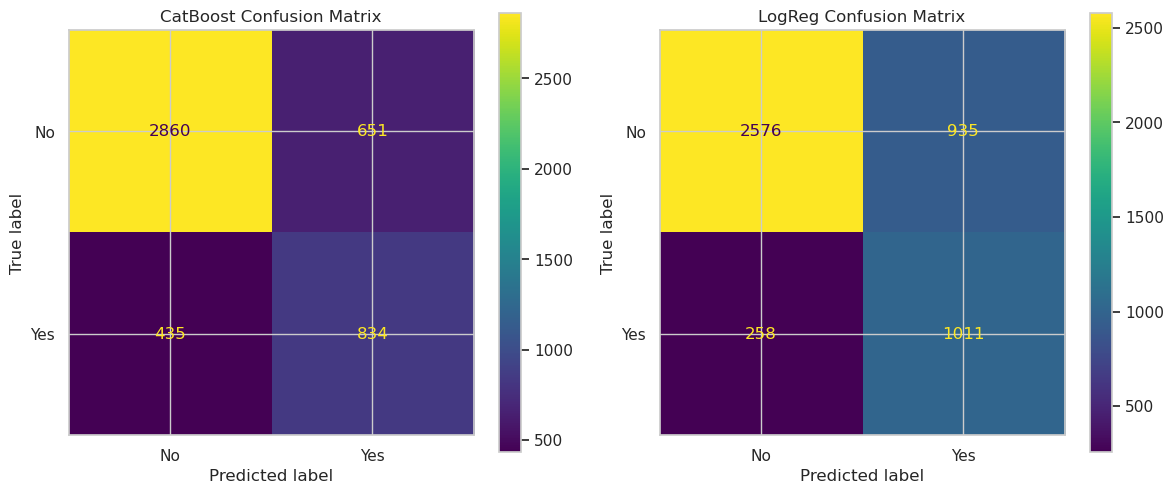

📌 Retraining models on full balanced training set for SHAP...
📊 Computing SHAP values on 1000-sample from full resampled set...


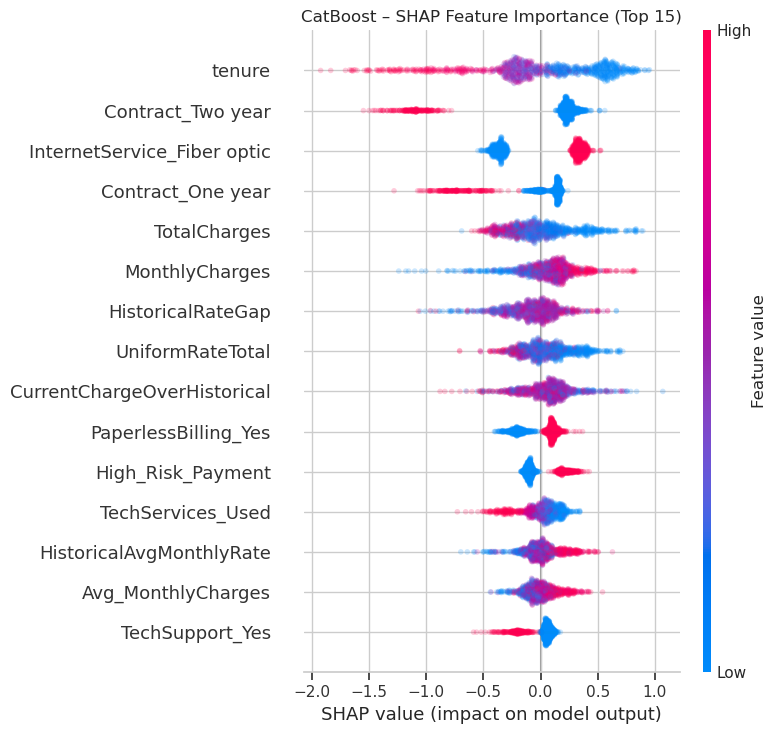

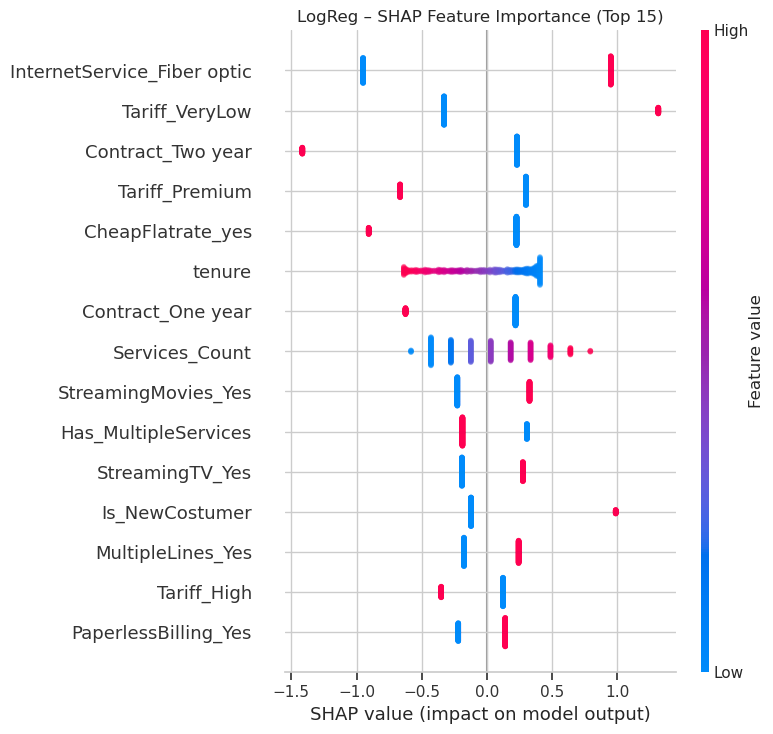

📊 Gathering feature importances...
📋 Combined Feature Importances:


,CatBoost_SHAP,LogReg_SHAP,CatBoost_Builtin,LogReg_Coefficient
tenure,0.444945,0.310021,8.486307,0.352472
Contract_Two year,0.403344,0.443888,5.592982,0.617490
InternetService_Fiber optic,0.354809,0.949897,2.836723,0.949141
Contract_One year,0.230523,0.292298,2.978875,0.319399
TotalCharges,0.220481,0.058328,5.724426,0.070714
MonthlyCharges,0.201151,0.092386,8.067536,0.105377
HistoricalRateGap,0.179856,0.014811,9.071177,0.022070
UniformRateTotal,0.179167,0.058818,5.641859,0.071401
CurrentChargeOverHistorical,0.175828,0.021564,8.375252,0.031355
PaperlessBilling_Yes,0.144755,0.171221,1.999847,0.173122


📊 Precision and Recall vs Threshold...


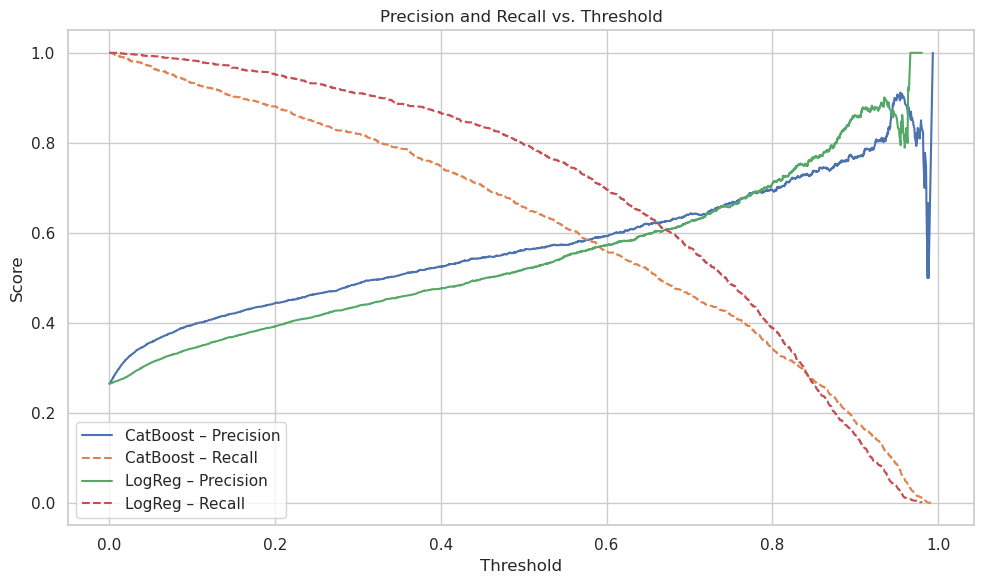

In [62]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import shap, pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display

# 📌 Setup CV
print("📌 Setting up Stratified 5-Fold CV...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ⏱️ Store results
cat_preds, lr_preds = [], []
cat_probs, lr_probs = [], []
cat_true, lr_true = [], []

# 🧪 CV loop with oversampling inside
fold = 0
scaler = StandardScaler()  # Create scaler once
for train_idx, val_idx in skf.split(X_train, y_train):
    fold += 1
    print(f"\n🔁 Fold {fold}")

    # Split and oversample
    X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    ros = RandomOverSampler(random_state=42)
    X_tr_resampled, y_tr_resampled = ros.fit_resample(X_tr, y_tr)

    # Scale for LogReg
    X_tr_scaled = scaler.fit_transform(X_tr_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Train CatBoost
    cat = CatBoostClassifier(verbose=0, random_state=42, iterations=600, learning_rate=0.05)
    cat.fit(X_tr_resampled, y_tr_resampled)
    cat_preds.append(cat.predict(X_val))
    cat_probs.append(cat.predict_proba(X_val)[:, 1])
    cat_true.append(y_val)

    # Train Logistic Regression
    lr = LogisticRegression(max_iter=5000, random_state=42)
    lr.fit(X_tr_scaled, y_tr_resampled)
    lr_preds.append(lr.predict(X_val_scaled))
    lr_probs.append(lr.predict_proba(X_val_scaled)[:, 1])
    lr_true.append(y_val)

# 📊 Concatenate results
y_true_cat = pd.concat(cat_true)
y_pred_cat = np.concatenate(cat_preds)
y_prob_cat = np.concatenate(cat_probs)

y_true_lr = pd.concat(lr_true)
y_pred_lr = np.concatenate(lr_preds)
y_prob_lr = np.concatenate(lr_probs)

# 📋 Classification Reports
print("\n📋 Classification Report – CatBoost:")
print(classification_report(y_true_cat, y_pred_cat, target_names=["No", "Yes"]))

print("\n📋 Classification Report – Logistic Regression:")
print(classification_report(y_true_lr, y_pred_lr, target_names=["No", "Yes"]))

# 📊 Confusion Matrices
print("📊 Confusion Matrices...")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_true_cat, y_pred_cat, ax=ax[0], display_labels=["No", "Yes"])
ax[0].set_title("CatBoost Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_true_lr, y_pred_lr, ax=ax[1], display_labels=["No", "Yes"])
ax[1].set_title("LogReg Confusion Matrix")
plt.tight_layout()
plt.show()

# 🔁 Re-train final models on full resampled training set for SHAP
print("📌 Retraining models on full balanced training set for SHAP...")
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled_scaled = scaler.fit_transform(X_resampled)

cat_final = CatBoostClassifier(verbose=0, random_state=42, iterations=600, learning_rate=0.05)
cat_final.fit(X_resampled, y_resampled)

lr_final = LogisticRegression(max_iter=5000, random_state=42)
lr_final.fit(X_resampled_scaled, y_resampled)

# 📊 SHAP values on sample
print("📊 Computing SHAP values on 1000-sample from full resampled set...")
X_sample_cat = X_resampled.sample(1000, random_state=42)
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample_cat), columns=X_sample_cat.columns, index=X_sample_cat.index)

explainer_cat = shap.Explainer(cat_final)
shap_vals_cat = explainer_cat(X_sample_cat)

explainer_lr = shap.Explainer(lr_final, X_sample_scaled)
shap_vals_lr = explainer_lr(X_sample_scaled)

# 🔍 SHAP Summary Plots
shap.summary_plot(shap_vals_cat, X_sample_cat, max_display=15, show=False, alpha=0.2)
plt.title("CatBoost – SHAP Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_vals_lr, X_sample_cat, max_display=15, show=False, alpha=0.2)
plt.title("LogReg – SHAP Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

# 📊 Built-in feature importances
print("📊 Gathering feature importances...")
cat_importance = pd.Series(cat_final.feature_importances_, index=X_train.columns)
lr_coeff = pd.Series(np.abs(lr_final.coef_[0]), index=X_train.columns)

shap_mean_cat = pd.Series(np.abs(shap_vals_cat.values).mean(axis=0), index=X_sample_cat.columns)
shap_mean_lr = pd.Series(np.abs(shap_vals_lr.values).mean(axis=0), index=X_sample_cat.columns)

# 🧾 Combine into one DataFrame
all_importances = pd.DataFrame(
    {"CatBoost_SHAP": shap_mean_cat, "LogReg_SHAP": shap_mean_lr, "CatBoost_Builtin": cat_importance, "LogReg_Coefficient": lr_coeff}
).sort_values("CatBoost_SHAP", ascending=False)

print("📋 Combined Feature Importances:")
display(all_importances)


# 🎯 Precision/Recall Curve
def plot_precision_recall_vs_threshold(y_true, y_scores, label):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    plt.plot(thresholds, precisions[:-1], label=f'{label} – Precision', linestyle='-')
    plt.plot(thresholds, recalls[:-1], label=f'{label} – Recall', linestyle='--')


print("📊 Precision and Recall vs Threshold...")
plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(y_true_cat, y_prob_cat, label="CatBoost")
plot_precision_recall_vs_threshold(y_true_lr, y_prob_lr, label="LogReg")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [63]:
# Example: Evaluate CatBoost on real test set
print("📊 Final Evaluation on X_test:")
cat_test_pred = cat_final.predict(X_test)
lr_test_pred = lr_final.predict(scaler.transform(X_test))

print("CatBoost:")
print(classification_report(y_test, cat_test_pred))

print("LogReg:")
print(classification_report(y_test, lr_test_pred))


📊 Final Evaluation on X_test:
CatBoost:
              precision    recall  f1-score   support

       False       0.87      0.81      0.84       878
        True       0.56      0.67      0.61       318

    accuracy                           0.77      1196
   macro avg       0.71      0.74      0.72      1196
weighted avg       0.79      0.77      0.78      1196

LogReg:
              precision    recall  f1-score   support

       False       0.90      0.73      0.81       878
        True       0.51      0.78      0.62       318

    accuracy                           0.74      1196
   macro avg       0.71      0.75      0.71      1196
weighted avg       0.80      0.74      0.76      1196

